# Check der Spurweite

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import geopandas as gpd
import os

In [4]:
folder = "/media/riannek/minimax/gleis/temp_run24"
filename = "temp.gpkg"

gdf = gpd.read_file(os.path.join(folder, filename), layer="multipoints")
gdf.head()

,eig x,eig y,eig z,gauge,min points,zeta a,zeta b,geometry
0,-0.659253,-0.751921,0.000098,1.434199,445,0.412587,0.726708,MULTIPOINT Z ((4475547.104 5341292.778 496.013...
1,-0.662848,-0.748701,0.008896,1.433986,451,-0.689441,-0.255172,MULTIPOINT Z ((4475547.331 5341293.035 496.012...
2,0.661145,0.750257,-0.001544,1.434691,448,-0.693252,-0.475862,MULTIPOINT Z ((4475546.822 5341292.457 496.015...
3,0.664815,0.746917,-0.011638,1.434298,465,-0.791411,-0.278912,"MULTIPOINT Z ((4475546.329 5341291.9 496.019),..."
4,-0.659378,-0.751807,0.002606,1.433074,456,0.438849,0.712575,MULTIPOINT Z ((4475544.776 5341290.139 496.029...


In [6]:
normal_gauge = 1435 
gdf["gauge diff"] = ((gdf["gauge"] * 1000) - normal_gauge).abs()
gdf.head()

,eig x,eig y,eig z,gauge,min points,zeta a,zeta b,geometry,gauge diff
0,-0.659253,-0.751921,0.000098,1.434199,445,0.412587,0.726708,MULTIPOINT Z ((4475547.104 5341292.778 496.013...,0.801012
1,-0.662848,-0.748701,0.008896,1.433986,451,-0.689441,-0.255172,MULTIPOINT Z ((4475547.331 5341293.035 496.012...,1.013816
2,0.661145,0.750257,-0.001544,1.434691,448,-0.693252,-0.475862,MULTIPOINT Z ((4475546.822 5341292.457 496.015...,0.309060
3,0.664815,0.746917,-0.011638,1.434298,465,-0.791411,-0.278912,"MULTIPOINT Z ((4475546.329 5341291.9 496.019),...",0.701636
4,-0.659378,-0.751807,0.002606,1.433074,456,0.438849,0.712575,MULTIPOINT Z ((4475544.776 5341290.139 496.029...,1.926342


In [7]:
gdf["gauge diff"].describe()

count    339210.000000
mean          2.412220
std           2.795376
min           0.000014
25%           0.703174
50%           1.528885
75%           3.102761
max          24.993516
Name: gauge diff, dtype: float64

<Axes: ylabel='Frequency'>

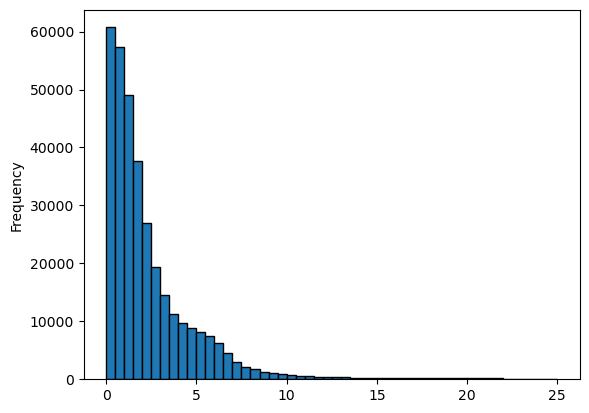

In [8]:
gdf["gauge diff"].plot.hist(bins=50, edgecolor='black')

In [10]:
gdf["gauge mm"] = gdf["gauge"] * 1000
gdf["gauge mm"].describe()

count    339210.000000
mean       1436.277469
std           3.464248
min        1410.057229
25%        1434.406325
50%        1435.798040
75%        1437.652210
max        1459.993516
Name: gauge mm, dtype: float64

<Axes: ylabel='Frequency'>

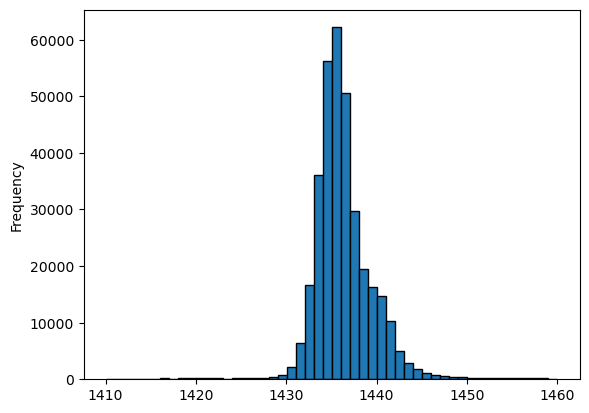

In [11]:
gdf["gauge mm"].plot.hist(bins=50, edgecolor='black')